In [3]:
import pandas as pd
df = pd.read_csv('student_feedback.csv')
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [39]:

print(df.isnull().sum())

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
overall_satisfaction                                    0
dtype: int64


As you can see from the output above, there are no missing values in the DataFrame. Also, all the columns are of integer type, which means there are no text columns to normalize.

In [8]:
df = df.drop_duplicates()
print("Shape of the DataFrame after removing duplicates:", df.shape)

Shape of the DataFrame after removing duplicates: (1001, 10)


In [9]:
rating_columns = [col for col in df.columns if col not in ['Unnamed: 0', 'Student ID']]
print("Summary statistics for rating columns:")
display(df[rating_columns].agg(['mean', 'median', lambda x: x.mode()[0]]).T.rename(columns={'<lambda>': 'mode'}))

Summary statistics for rating columns:


,mean,median,mode
Well versed with the subject,7.497502,8.0,9.0
Explains concepts in an understandable way,6.081918,6.0,9.0
Use of presentations,5.942058,6.0,4.0
Degree of difficulty of assignments,5.430569,5.0,6.0
Solves doubts willingly,5.474525,6.0,6.0
Structuring of the course,5.636364,6.0,10.0
Provides support for students going above and beyond,5.662338,6.0,7.0
Course recommendation based on relevance,5.598402,6.0,9.0


In [38]:
!pip install textblob vaderSentiment

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


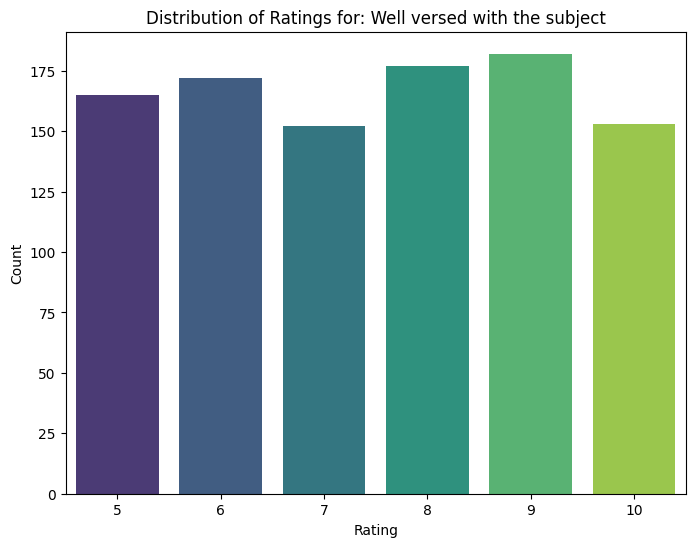

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


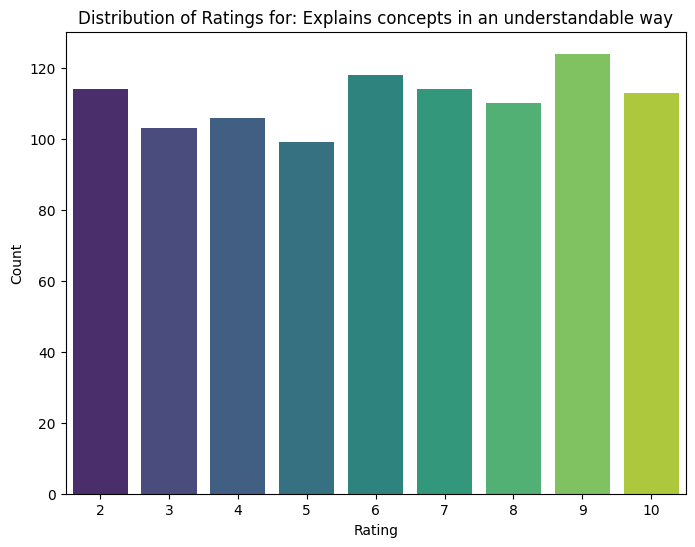

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


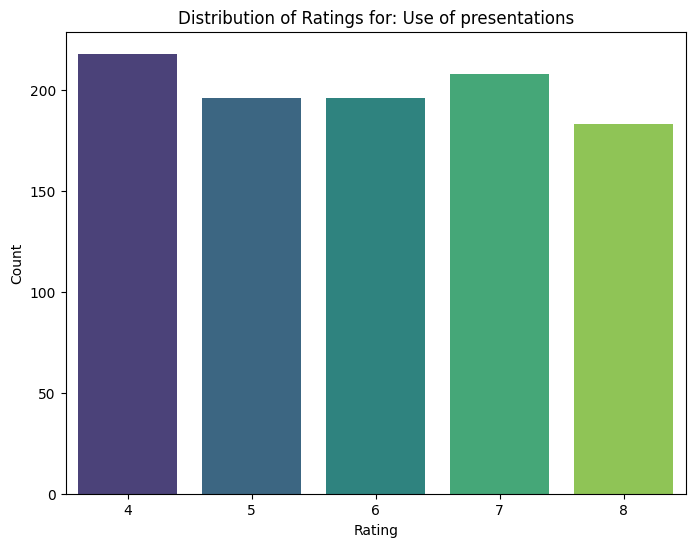

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


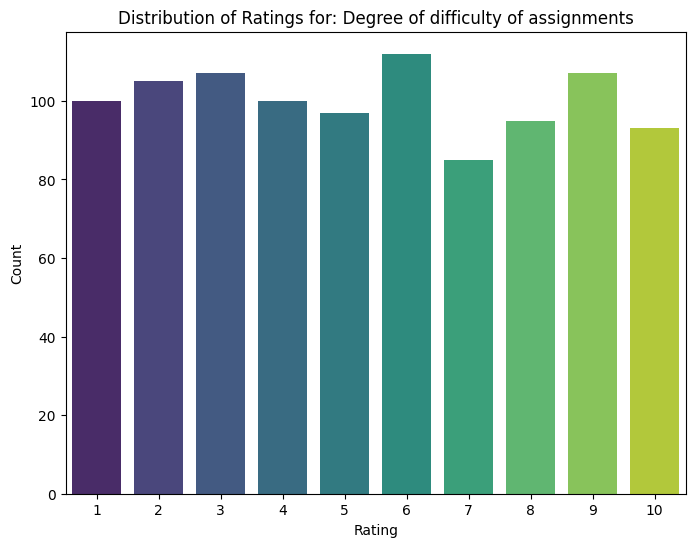

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


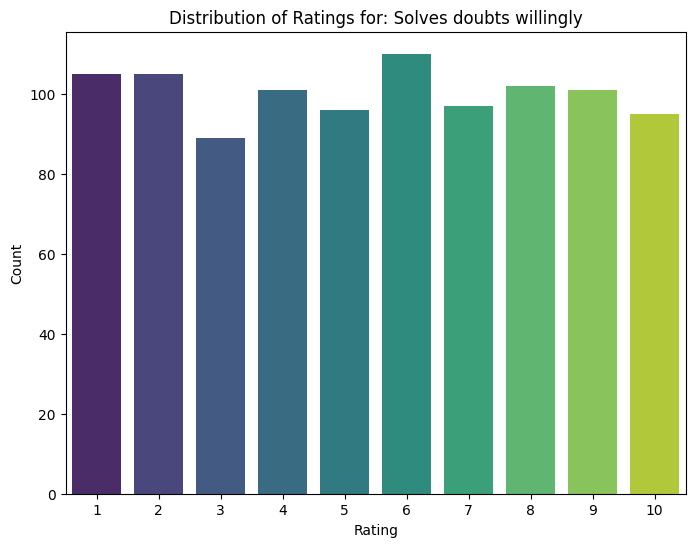

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


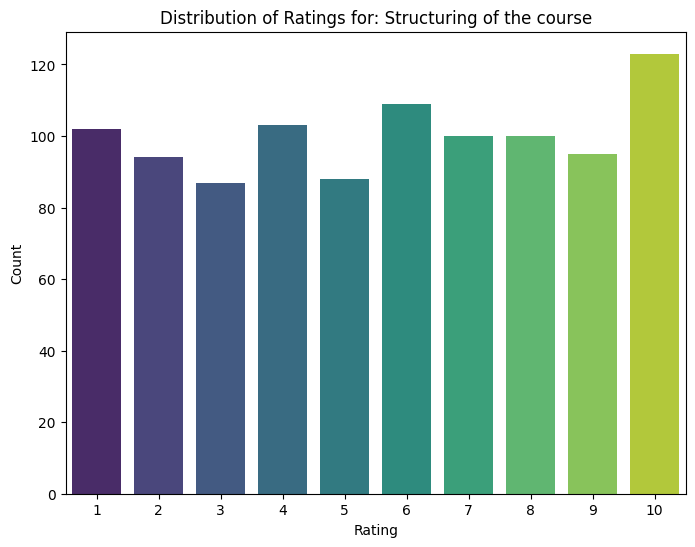

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


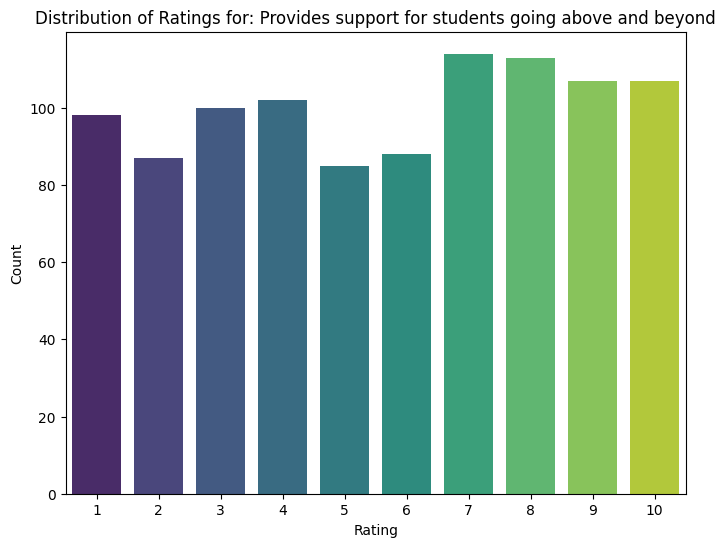

/tmp/ipython-input-13-2179131114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


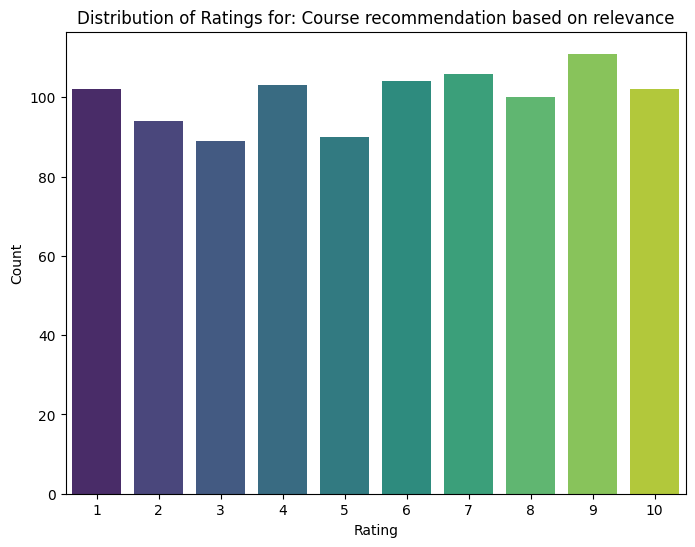

In [13]:
rating_columns = [col for col in df.columns if col not in ['Unnamed: 0', 'Student ID']]

for col in rating_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of Ratings for: {col}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

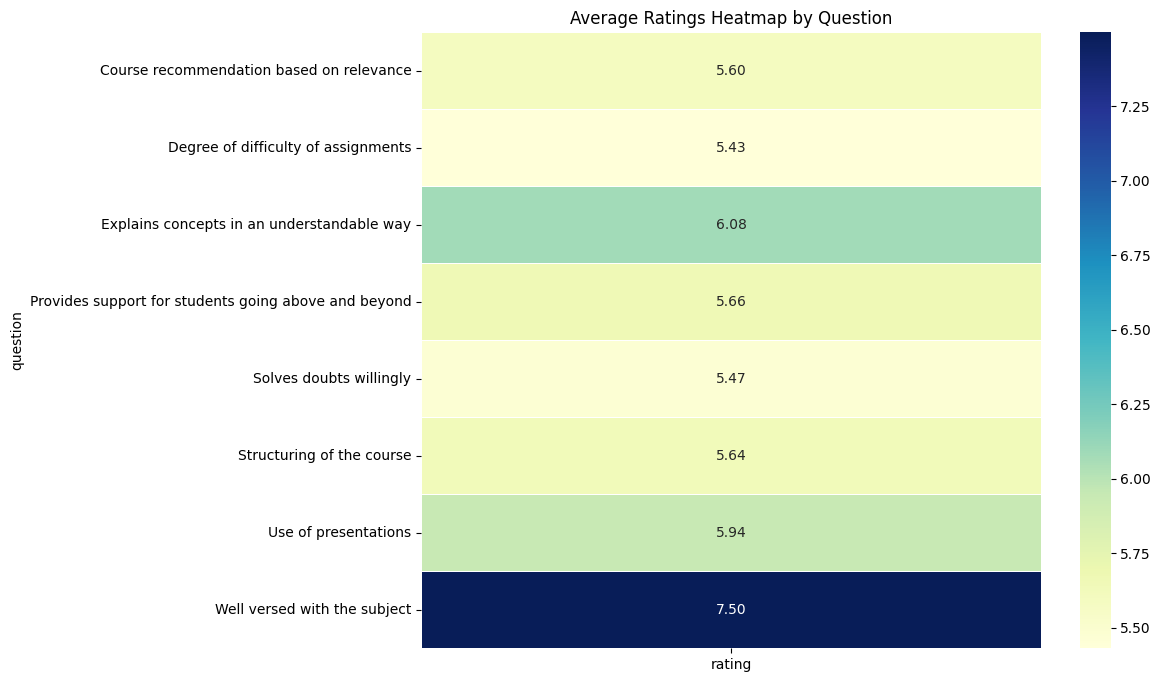

In [15]:

df_melted = df.melt(
    value_vars=rating_columns,
    var_name='question',
    value_name='rating'
)

heatmap_data = df_melted.groupby('question')['rating'].mean().reset_index()
heatmap_data = heatmap_data.pivot_table(
    index='question',
    values='rating',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5, linecolor='white')
plt.title('Average Ratings Heatmap by Question')
plt.yticks(rotation=0)
plt.show()

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

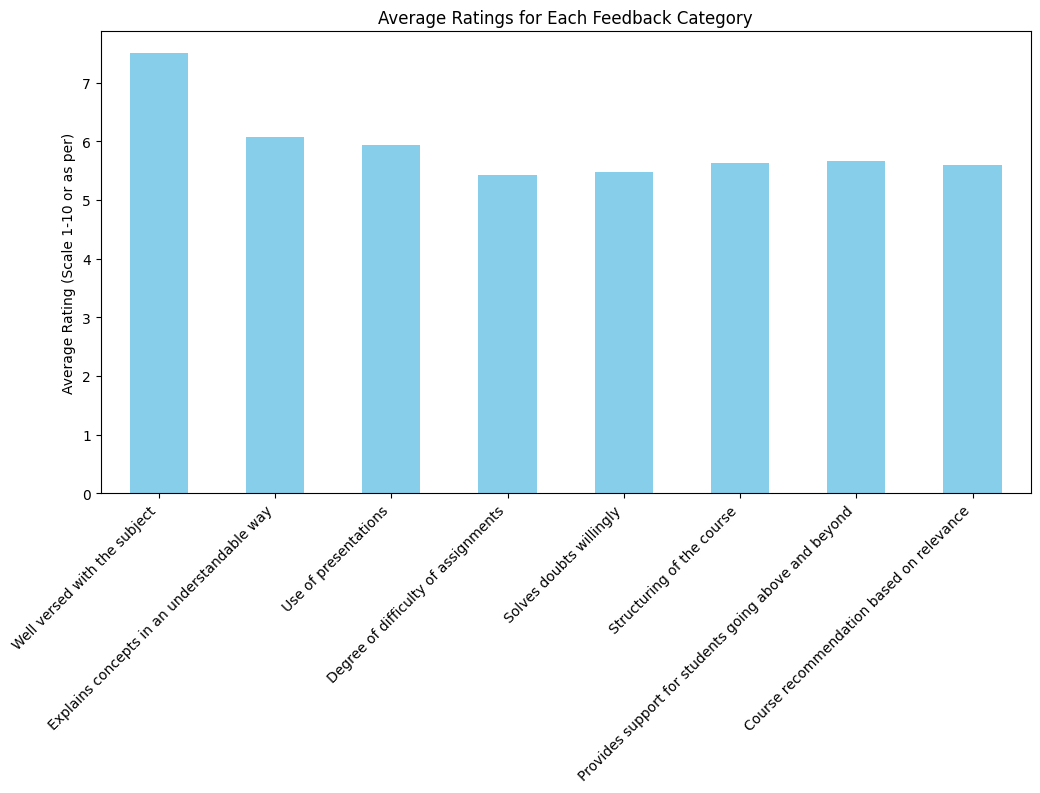

In [21]:
mean_ratings = df[rating_columns].mean()
plt.figure(figsize=(12,6))
mean_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings for Each Feedback Category')
plt.ylabel('Average Rating (Scale 1-10 or as per)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
import numpy as np

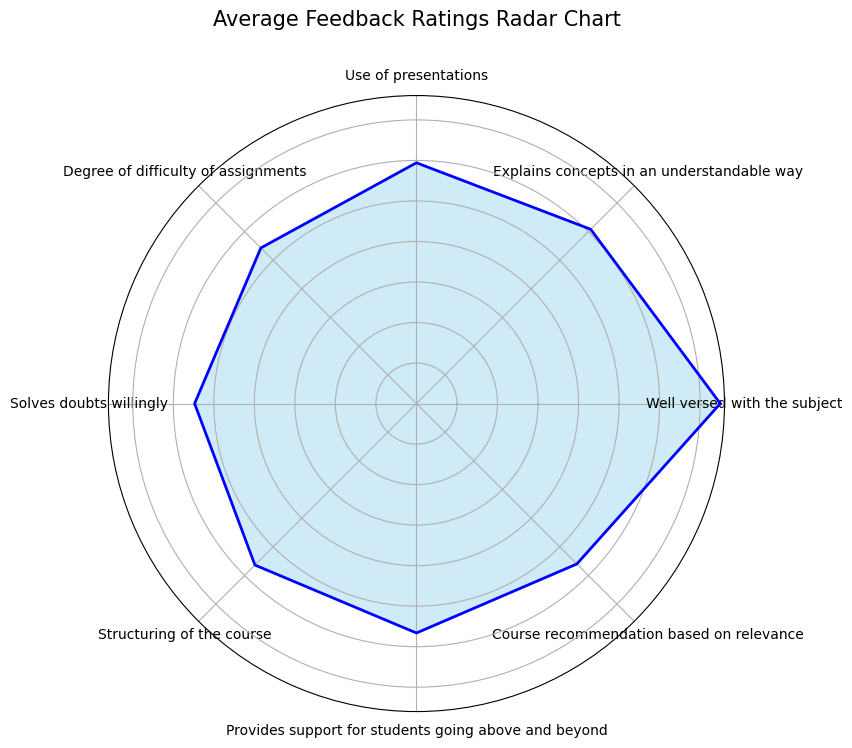

In [25]:


labels = rating_columns
num_vars = len(labels)
values = mean_ratings.values.flatten().tolist()
values += values[:1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='blue', linewidth=2)
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels([])
ax.set_title('Average Feedback Ratings Radar Chart', size=15, y=1.1)
plt.show()

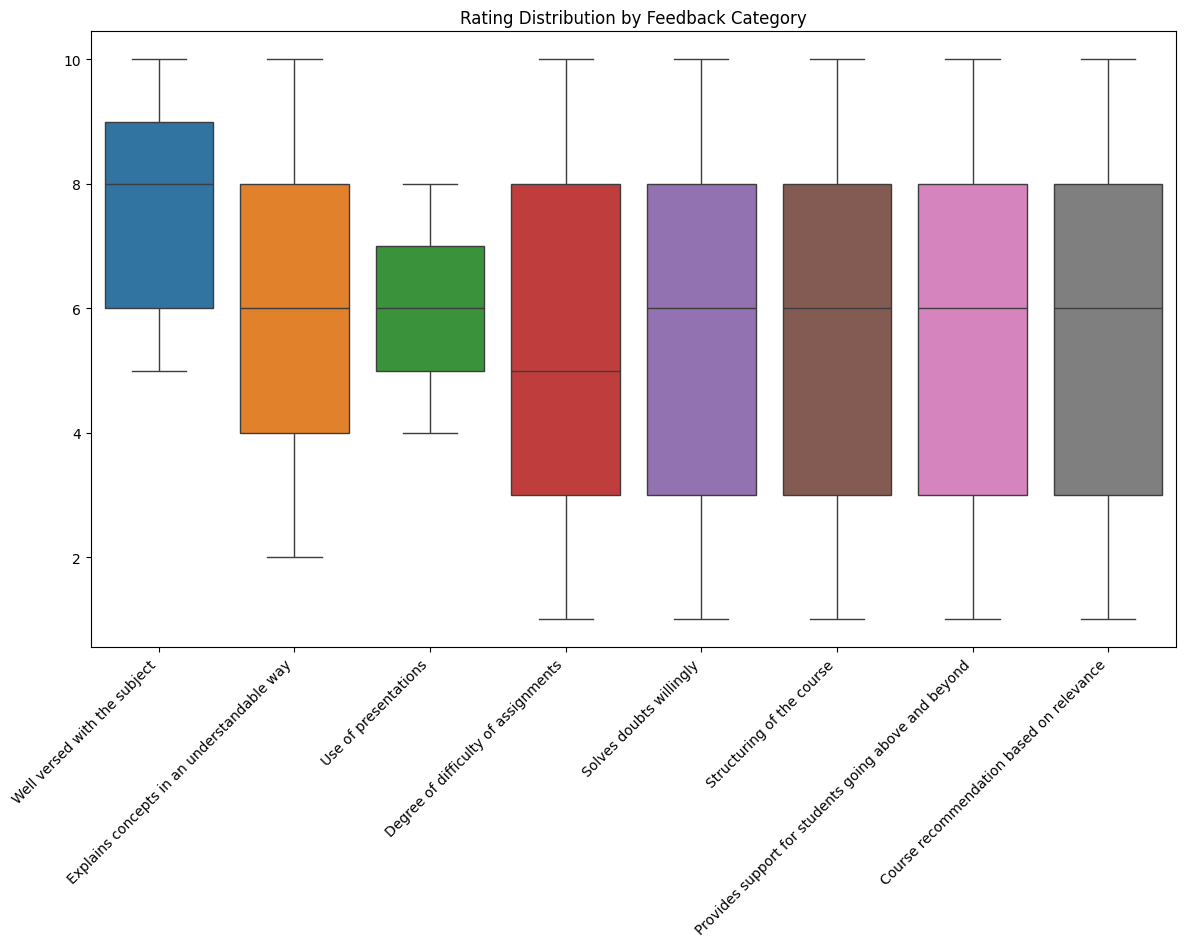

In [27]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df[rating_columns])
plt.title('Rating Distribution by Feedback Category')
plt.xticks(rotation=45, ha='right')
plt.show()

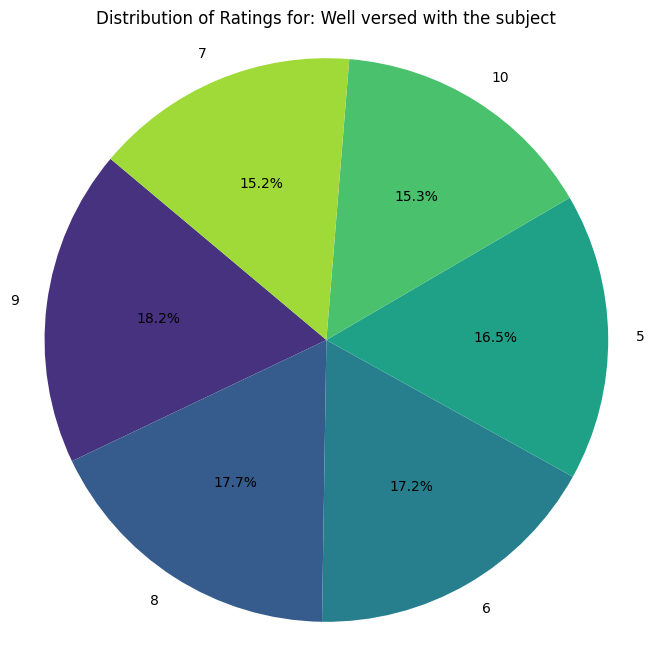

In [31]:
rating_counts = df['Well versed with the subject'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('viridis', len(rating_counts)))
plt.title('Distribution of Ratings for: Well versed with the subject')
plt.axis('equal')
plt.show()



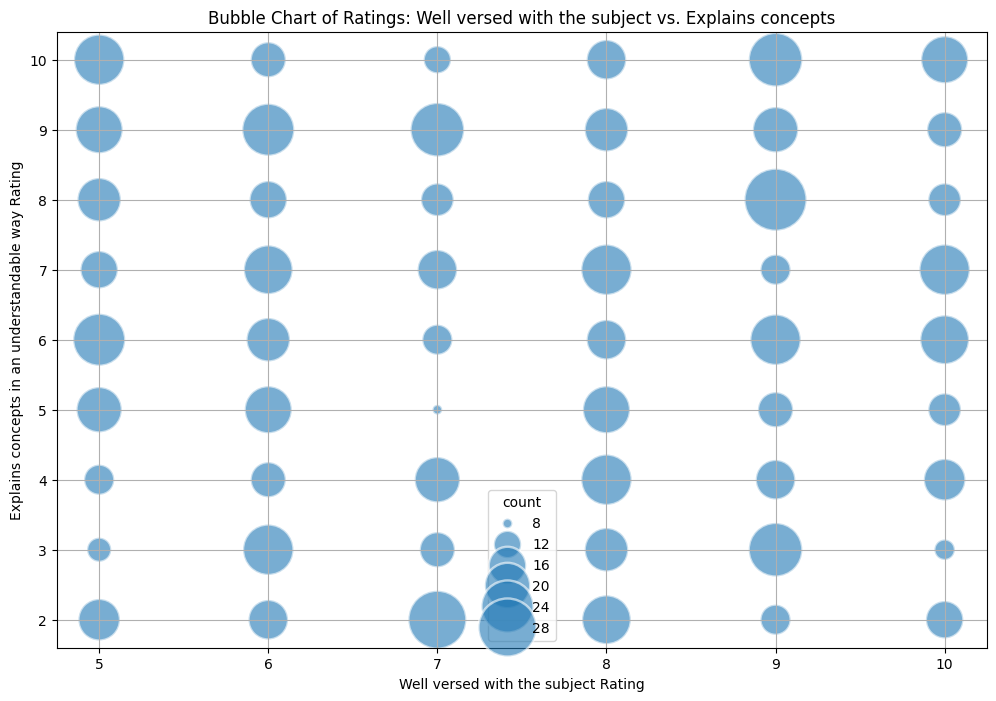

In [33]:
bubble_data = df.groupby(['Well versed with the subject', 'Explains concepts in an understandable way']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=bubble_data, x='Well versed with the subject', y='Explains concepts in an understandable way', size='count', sizes=(50, 2000), alpha=0.6, legend='brief')
plt.title('Bubble Chart of Ratings: Well versed with the subject vs. Explains concepts')
plt.xlabel('Well versed with the subject Rating')
plt.ylabel('Explains concepts in an understandable way Rating')
plt.grid(True)
plt.show()

In [37]:
df['overall_satisfaction'] = df[rating_cols].mean(axis=1)
average_overall_satisfaction = df['overall_satisfaction'].mean()
print("Average Overall Satisfaction:", average_overall_satisfaction)


Average Overall Satisfaction: 5.9154595404595405
